In [4]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [16]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
dataiter = iter(trainloader)

images, labels = next(dataiter)

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.2945, grad_fn=<NllLossBackward>)


In [17]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0021, -0.0021, -0.0021,  ..., -0.0021, -0.0021, -0.0021],
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        ...,
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030],
        [ 0.0044,  0.0044,  0.0044,  ...,  0.0044,  0.0044,  0.0044]])


In [18]:
from torch import optim

In [19]:
# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [20]:
print('Initial weights - ', model[0].weight)

dataiter = iter(trainloader)
images, labels = next(dataiter)
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0349,  0.0186,  0.0210,  ..., -0.0120, -0.0199, -0.0148],
        [-0.0122,  0.0209,  0.0208,  ..., -0.0012, -0.0337,  0.0342],
        [-0.0071,  0.0265,  0.0278,  ..., -0.0347, -0.0243, -0.0220],
        ...,
        [-0.0026,  0.0261,  0.0053,  ..., -0.0312, -0.0343, -0.0061],
        [ 0.0053, -0.0330,  0.0007,  ...,  0.0029,  0.0063, -0.0027],
        [ 0.0012,  0.0151,  0.0148,  ..., -0.0225,  0.0046, -0.0308]],
       requires_grad=True)
Gradient - tensor([[-0.0023, -0.0023, -0.0023,  ..., -0.0023, -0.0023, -0.0023],
        [ 0.0018,  0.0018,  0.0018,  ...,  0.0018,  0.0018,  0.0018],
        [-0.0054, -0.0054, -0.0054,  ..., -0.0054, -0.0054, -0.0054],
        ...,
        [ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [ 0.0062,  0.0062,  0.0062,  ...,  0.0062,  0.0062,  0.0062]])


In [21]:
# Take an update step and view the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0349,  0.0187,  0.0210,  ..., -0.0120, -0.0199, -0.0148],
        [-0.0122,  0.0209,  0.0208,  ..., -0.0013, -0.0337,  0.0342],
        [-0.0071,  0.0265,  0.0279,  ..., -0.0347, -0.0243, -0.0219],
        ...,
        [-0.0026,  0.0261,  0.0052,  ..., -0.0312, -0.0344, -0.0061],
        [ 0.0053, -0.0330,  0.0006,  ...,  0.0029,  0.0063, -0.0027],
        [ 0.0012,  0.0150,  0.0147,  ..., -0.0226,  0.0046, -0.0309]],
       requires_grad=True)


In [23]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        #print('Gradient -', model[0].weight.grad)
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9662835031175918
Training loss: 0.930400448821501
Training loss: 0.5507885436259353
Training loss: 0.44034753337915516
Training loss: 0.39039392883716617


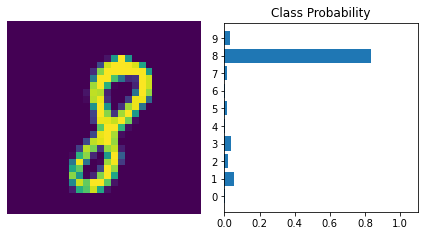

In [32]:
%matplotlib inline
import helper

dataiter = iter(trainloader)
images, labels = next(dataiter)

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)